In [1]:
from EDATools.EDA import ExploratoryDataAnalysis
from RegressionTools.OLSFeatureSelection import p_backward, p_forward, cv_forward
from RegressionTools.linearModels import RegressionAnalysis

In [6]:
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=165)
X = dataset.data.features
y = dataset.data.targets

df = X.copy()
df['y'] = y

df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [16]:
# Step 1: EDA
eda = ExploratoryDataAnalysis(dataframe=df,
                              target_column='y',
                              problem_type='regression')
eda.run_full_analysis()

Starting Exploratory Data Analysis...
1/6 Basic Overview...
2/6 Data Quality Check...
3/6 Univariate Analysis...
4/6 Bivariate Analysis...
5/6 Skipping Temporal Analysis (no time component detected)
6/6 Multivariate Analysis...

Analysis complete! Use generate_report() to view findings.


In [14]:
print(eda.generate_report())  # View report overview

EXPLORATORY DATA ANALYSIS REPORT

DATASET OVERVIEW
--------------------------------------------------------------------------------
Rows: 1,030
Columns: 9
Memory Usage: 0.07 MB
Target Variable: y
Problem Type: regression
Numeric Features: 7
Categorical Features: 1

DATA QUALITY
--------------------------------------------------------------------------------
No missing values detected
Duplicate rows: 25 (2.43%)

WARNINGS
--------------------------------------------------------------------------------
! Column 'Age' treated as categorical (unique values: 14 <= 20)

KEY FINDINGS
--------------------------------------------------------------------------------
Top 5 features by correlation with target:
  Cement: 0.498
  Superplasticizer: 0.366
  Water: -0.290
  Fine Aggregate: -0.167
  Coarse Aggregate: -0.165

Total figures generated: 17
Use .get_figure(name) to view specific plots
Use .export_report(filepath) to save as HTML


In [15]:
eda.export_report(f"concrete_eda.html")  # Export dashboard to interactive HTML file

Report exported to concrete_eda.html


In [7]:
# Step 2: Check OLS features (p-value based)
keep_forward = sorted(p_forward(X, y, thresh=0.05, loud=False))
keep_backward = sorted(p_backward(X, y, thresh=0.05, loud=False))

print(f"Forward search:  {keep_forward}")
print(f"Backward search: {keep_backward}")

Forward search:  ['Age', 'Blast Furnace Slag', 'Cement', 'Fly Ash', 'Superplasticizer', 'Water']
Backward search: ['Age', 'Blast Furnace Slag', 'Cement', 'Fly Ash', 'Superplasticizer', 'Water']


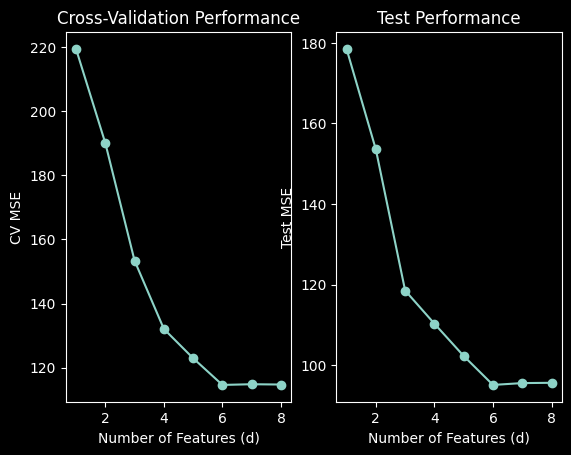

{1: {'features': ['Cement'], 'cv_mse': np.float64(219.40048064236672), 'test_mse': 178.51464605924428}, 2: {'features': ['Cement', 'Superplasticizer'], 'cv_mse': np.float64(190.04338152226705), 'test_mse': 153.5548342701622}, 3: {'features': ['Cement', 'Superplasticizer', 'Age'], 'cv_mse': np.float64(153.34687711723984), 'test_mse': 118.52488373835781}, 4: {'features': ['Cement', 'Superplasticizer', 'Age', 'Blast Furnace Slag'], 'cv_mse': np.float64(132.0723632812047), 'test_mse': 110.29536919291955}, 5: {'features': ['Cement', 'Superplasticizer', 'Age', 'Blast Furnace Slag', 'Water'], 'cv_mse': np.float64(122.93511132954822), 'test_mse': 102.2774650730937}, 6: {'features': ['Cement', 'Superplasticizer', 'Age', 'Blast Furnace Slag', 'Water', 'Fly Ash'], 'cv_mse': np.float64(114.60662184364487), 'test_mse': 95.08915151064195}, 7: {'features': ['Cement', 'Superplasticizer', 'Age', 'Blast Furnace Slag', 'Water', 'Fly Ash', 'Coarse Aggregate'], 'cv_mse': np.float64(114.8221962767957), 'tes

In [8]:
# Step 2b: Check OLS features via CV
results = cv_forward(X, y, loud=True)
print(results)

In [9]:
# So d=6 seems to be the best subset.

In [11]:
# Step 3: Run regression analysis
analysis = RegressionAnalysis(
    data=df,
    target='y',
    features=keep_forward,  # Remove this argument to use whole feature set
    test_size=0.2,
    random_state=0
)
analysis.run_analysis()
plots = analysis.create_dashboard()


Preparing data...
Fitting OLS...
Fitting Ridge...
Fitting Lasso...
Fitting ElasticNet...
Analysis complete!

REGRESSION ANALYSIS DASHBOARD

--- Variance Inflation Factors ---
           Feature       VIF
             Water 21.081884
            Cement 14.231258
           Fly Ash  3.878135
  Superplasticizer  3.844541
Blast Furnace Slag  3.022251
               Age  1.657276

--- Model Performance Summary ---
     Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Test_MAE   CV_Score
       OLS  0.606994 0.638965   10.532483   9.751367  7.814469        NaN
     Ridge  0.606947 0.638957   10.533119   9.751487  7.811921 113.880956
     Lasso  0.606976 0.639110   10.532723   9.749408  7.810243 113.900619
ElasticNet  0.606909 0.638935   10.533618   9.751774  7.811255 113.881148

--- Coefficient Comparison Across Models ---
                          OLS      Ridge      Lasso  ElasticNet
Feature                                                        
Age                  7.090386   7.049941   

In [ ]:
# Optional: Show plots
for plot_name, fig in plots.items():
    fig.show()